## Datetime manipulation

When imported from files, dates are just string:

In [2]:
import pandas as pd
from datetime import datetime

In [3]:
google = pd.read_csv('stocks/GOOGL_2006-01-01_to_2018-01-01.csv')
google.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null object
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


However strings can be easily converted into datetime and set as index:

In [4]:
google.Date = pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
Date      3019 non-null datetime64[ns]
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.2+ KB


In [5]:
google.set_index('Date', inplace=True)
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


The same result can be achieved just with parse_date argument of read_csv:

In [5]:
google = pd.read_csv('stocks/GOOGL_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


We can also plot the series:

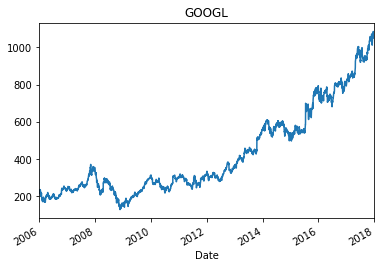

In [8]:
google.Close.plot(title='GOOGL')

In [9]:
google = google[['Close','Volume']]
google.head()

,Close,Volume
Date,,
2006-01-03,217.83,13137450
2006-01-04,222.84,15292353
2006-01-05,225.85,10815661
2006-01-06,233.06,17759521
2006-01-09,233.68,12795837


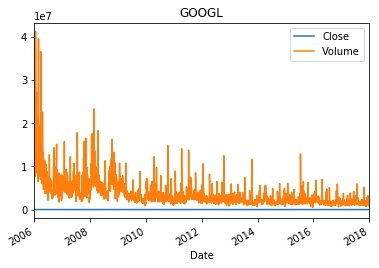

In [10]:
google.plot(title='GOOGL')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121461c88>,
      dtype=object)

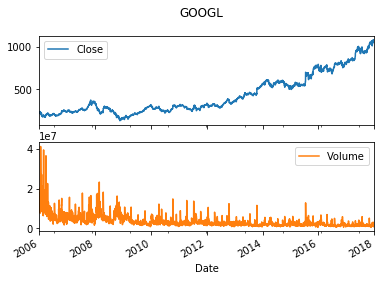

In [11]:
google.plot(title='GOOGL', subplots=True)

## Datetime selection

Datetime index allows to select and resample:

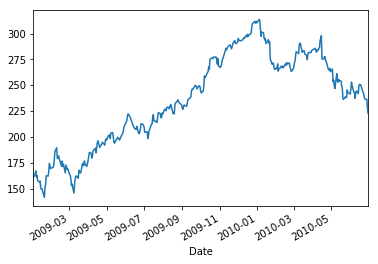

In [12]:
google['2009-1':'2010-6'].Close.plot()

In [13]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 2 columns):
Close     3019 non-null float64
Volume    3019 non-null int64
dtypes: float64(1), int64(1)
memory usage: 150.8 KB


## Datetime resampling

![](images/freq.png)

In [14]:
google_monthly = google.asfreq('M')
google_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2006-01-31 to 2017-11-30
Freq: M
Data columns (total 2 columns):
Close     102 non-null float64
Volume    102 non-null float64
dtypes: float64(2)
memory usage: 3.4 KB


In [14]:
google_monthly.tail()

,Close,Volume
Date,,
2017-07-31,945.50,2293389.0
2017-08-31,955.24,1693313.0
2017-09-30,NaN,NaN
2017-10-31,1033.04,1516278.0
2017-11-30,1036.17,2254590.0


In [15]:
google_monthly = google.asfreq('MS')
google_monthly.tail()

,Close,Volume
Date,,
2017-08-01,946.56,1332456.0
2017-09-01,951.99,1042885.0
2017-10-01,NaN,NaN
2017-11-01,1042.60,2163073.0
2017-12-01,1025.07,1888081.0


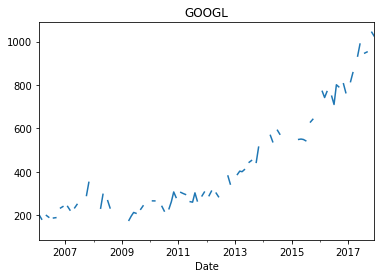

In [16]:
google_monthly.Close.plot(title='GOOGL')

We can fill missing data:

![](images/fill.png)

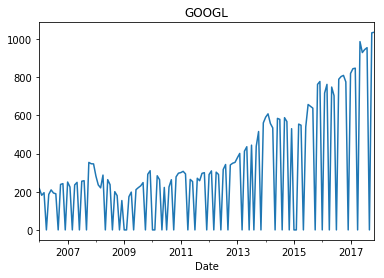

In [17]:
google_monthly = google.asfreq('M',fill_value=0)
google_monthly.Close.plot(title='GOOGL')

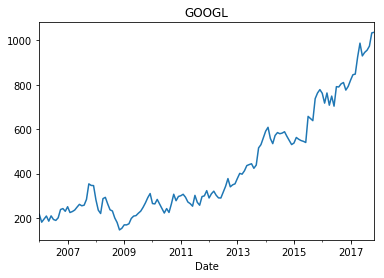

In [18]:
google_monthly = google.asfreq('M',method='ffill')
google_monthly.Close.plot(title='GOOGL')

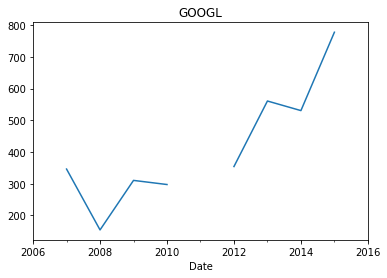

In [19]:
google_yearly = google.asfreq('Y',how='ffill')
google_yearly.Close.plot(title='GOOGL')

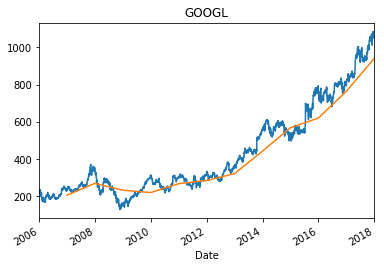

In [20]:
google_yearly = google.resample('Y').mean()
google.Close.plot()
google_yearly.Close.plot(title='GOOGL')

## Shift, diff, pct_change

In [21]:
google['Shifted'] = google.Close.shift() 
google[['Close','Shifted']].head()

,Close,Shifted
Date,,
2006-01-03,217.83,NaN
2006-01-04,222.84,217.83
2006-01-05,225.85,222.84
2006-01-06,233.06,225.85
2006-01-09,233.68,233.06


In [21]:
google['Shifted'] = google.Close.shift(periods=-2) #try also negative
google[['Close','Shifted']].head()

,Close,Shifted
Date,,
2006-01-03,217.83,225.85
2006-01-04,222.84,233.06
2006-01-05,225.85,233.68
2006-01-06,233.06,235.11
2006-01-09,233.68,236.05


In [23]:
google['Shifted'] = google.Close.asfreq('3D').shift()
google[['Close','Shifted']].head(20)

,Close,Shifted
Date,,
2006-01-03,217.83,NaN
2006-01-04,222.84,NaN
2006-01-05,225.85,NaN
2006-01-06,233.06,217.83
2006-01-09,233.68,233.06
2006-01-10,235.11,NaN
2006-01-11,236.05,NaN
2006-01-12,232.05,233.68
2006-01-13,233.36,NaN


In [23]:
google['Shifted'] = google.Close.shift()
google['Diff'] = google.Close - google.Shifted # x_t - x_{t-1}
google['Diff2'] = google.Close.diff()
google[['Close','Diff','Diff2']].head()

,Close,Diff,Diff2
Date,,,
2006-01-03,217.83,NaN,NaN
2006-01-04,222.84,5.01,5.01
2006-01-05,225.85,3.01,3.01
2006-01-06,233.06,7.21,7.21
2006-01-09,233.68,0.62,0.62


In [24]:
google['Pct_change']=google.Close.pct_change()
google[['Close','Diff','Pct_change']].head() # (x_t - x_{t-1})/x_t

,Close,Diff,Pct_change
Date,,,
2006-01-03,217.83,NaN,NaN
2006-01-04,222.84,5.01,0.023000
2006-01-05,225.85,3.01,0.013507
2006-01-06,233.06,7.21,0.031924
2006-01-09,233.68,0.62,0.002660


## Rolling Average 

In [25]:
humidity = pd.read_csv('weather/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [26]:
#Do some cleaning
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


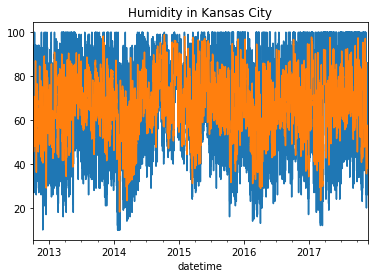

In [28]:
humidity["Kansas City"].plot(title='Humidity in Kansas City')
humidity["Kansas City"].rolling(window=30).mean().plot()

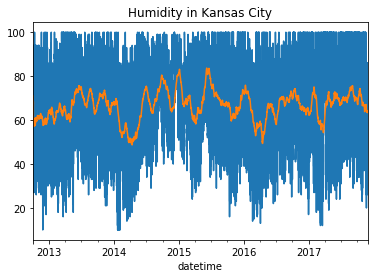

In [29]:
humidity["Kansas City"].plot(title='Humidity in Kansas City')
humidity["Kansas City"].rolling(window='30D').mean().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b12ceb8>,
      dtype=object)

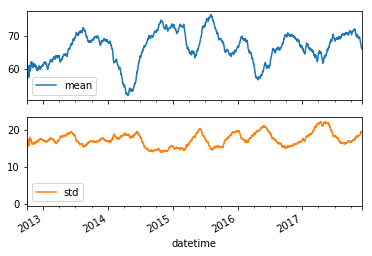

In [30]:
data = humidity["Kansas City"].rolling('90D').agg(['mean', 'std'])
data.plot(subplots=True)

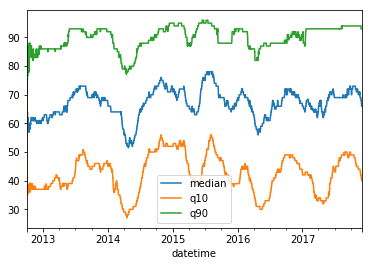

In [31]:
rolling = humidity["Kansas City"].rolling('90D')
data = rolling.median().to_frame('median')
data['q10'] = rolling.quantile(.1)
data['q90'] = rolling.quantile(.9)
data.plot()